In [ ]:
!pip install matplotlib
!pip install seaborn


In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('DMart.csv')
df.head()
df.info()
df.shape
df.isna().sum()
df['Category'].fillna(df['Category'].mode()[0], inplace=True)
df['Quantity'].fillna(df['Quantity'].mode()[0], inplace=True)
df['Brand'].fillna(df['Brand'].mode()[0], inplace=True)
df['Price'].fillna(df['Price'].mode()[0], inplace=True)
df['DiscountedPrice'].fillna(df['DiscountedPrice'].mode()[0], inplace=True)
df['SubCategory'].fillna(df['SubCategory'].mode()[0], inplace=True)
df['Description'].fillna(df['Description'].mode()[0], inplace=True)
df['BreadCrumbs'].fillna(df['BreadCrumbs'].mode()[0], inplace=True)
df['Name'].fillna(df['Name'].mode()[0], inplace=True)
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB
Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
dtype: int64


C:\Users\Niyati\AppData\Local\Temp\ipykernel_14232\3114914962.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna(df['Category'].mode()[0], inplace=True)
C:\Users\Niyati\AppData\Local\Temp\ipykernel_14232\3114914962.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [2]:
df['Category'].value_counts()

Category
Personal Care                    1237
Packaged Food                    1125
Home & Kitchen                    880
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         53
Beauty & Cosmetics                 46
Raincoat                           33
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Zebronics                           5
Motorbike Helmets                   4
Baby & Kids                         4
Geep                                3
Kitchen Aprons                      3
Butterfly                           2
Computer Accessories                2
Joyo Plastics                       2
Pigeon                              1
Syska                               1
Wat

C:\Users\Niyati\AppData\Local\Temp\ipykernel_14232\3244911798.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


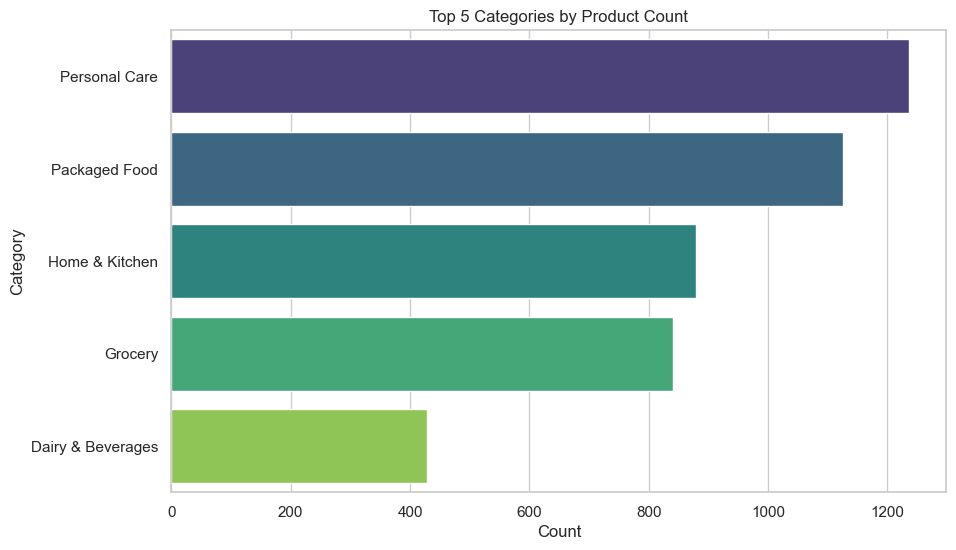

C:\Users\Niyati\AppData\Local\Temp\ipykernel_14232\3244911798.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Category', y='Price', palette="muted")


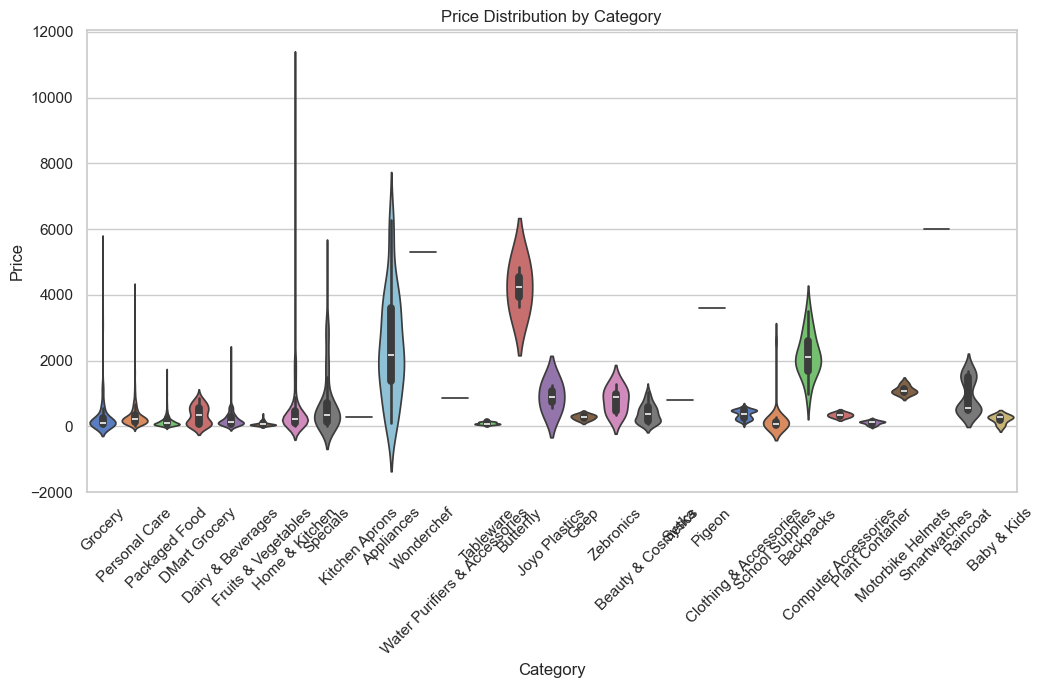

C:\Users\Niyati\AppData\Local\Temp\ipykernel_14232\3244911798.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SubCategory', y='DiscountedPrice', palette="coolwarm")


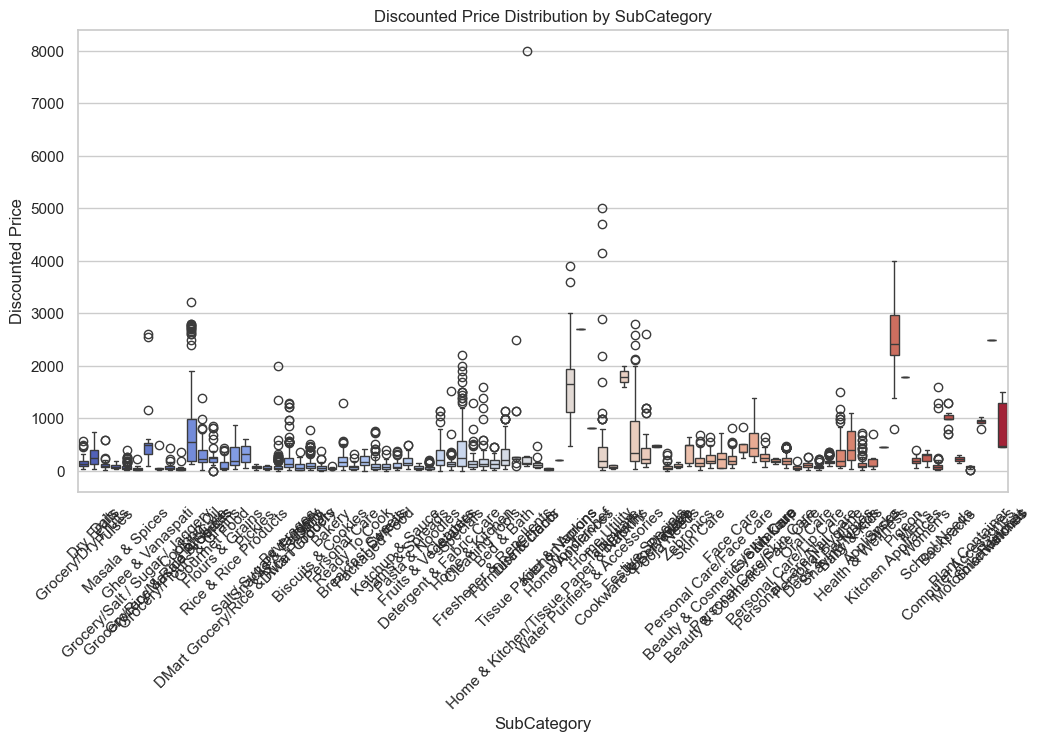

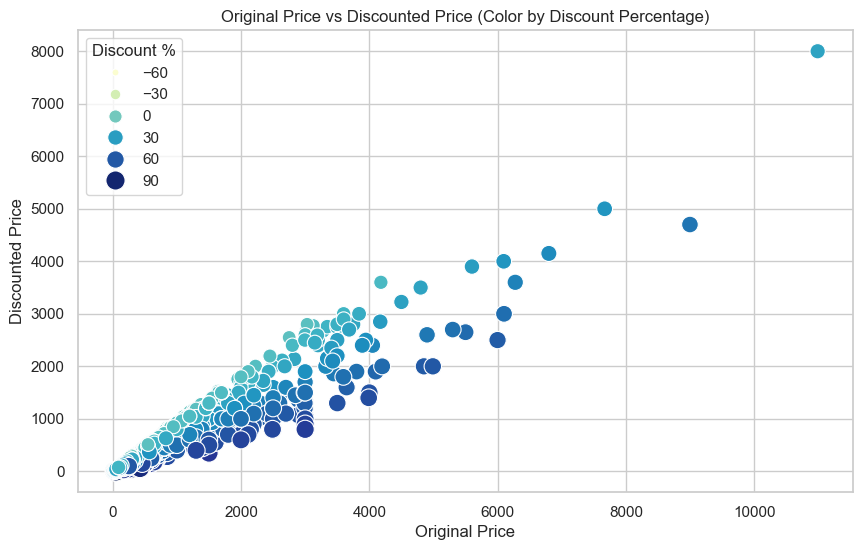

C:\Users\Niyati\AppData\Local\Temp\ipykernel_14232\3244911798.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="flare")


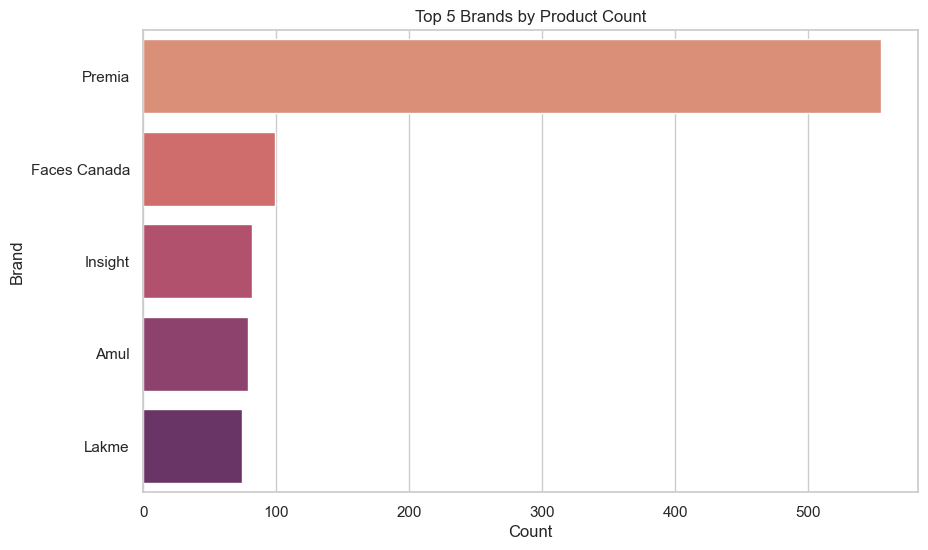

In [3]:
# Calculate discount percentage
df['DiscountPercentage'] = ((df['Price'] - df['DiscountedPrice']) / df['Price']) * 100

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# 1. Bar Plot: Top 5 Categories by Count
plt.figure(figsize=(10, 6))
top_categories = df['Category'].value_counts().head(5)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title('Top 5 Categories by Product Count')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# 2. Violin Plot: Price Distribution by Category
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Category', y='Price', palette="muted")
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# 3. Box Plot: Discounted Price by SubCategory
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='SubCategory', y='DiscountedPrice', palette="coolwarm")
plt.title('Discounted Price Distribution by SubCategory')
plt.xlabel('SubCategory')
plt.ylabel('Discounted Price')
plt.xticks(rotation=45)
plt.show()

# 4. Scatter Plot: Original Price vs Discounted Price with Discount Percentage as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='DiscountedPrice', hue='DiscountPercentage', palette="YlGnBu", size='DiscountPercentage', sizes=(20, 200), legend='brief')
plt.title('Original Price vs Discounted Price (Color by Discount Percentage)')
plt.xlabel('Original Price')
plt.ylabel('Discounted Price')
plt.legend(title='Discount %')
plt.show()

# 5. Count Plot: Top 5 Brands by Frequency
plt.figure(figsize=(10, 6))
top_brands = df['Brand'].value_counts().head(5)
sns.barplot(x=top_brands.values, y=top_brands.index, palette="flare")
plt.title('Top 5 Brands by Product Count')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()